# Задача 1

In [189]:
import numpy as np
import prettytable as pt
from matplotlib import pyplot as plt

In [190]:
def factorial(x):
    if x == 0:
        return 1
    else:
        return x * factorial(x - 1)

In [191]:
u = 1
u1 = 2

def f(x, y1):
    return -0.1 * y1 ** 2 - (1 + 0.1 * x) * y1

def u1_der1(x):
    return -0.1 * u1 ** 2 - (1 + 0.1 * x) * u

def u1_der2(x):
    return -0.2 * u1_der1(x) * u1 - (0.1 * u + (1 + 0.1 * x) * u1)

def u1_der3(x):
    return -0.2 * (u1_der1(x) ** 2 + u1 * u1_der2(x)) - (0.2 * u1 + (1 + 0.1 * x) * u1_der1(x))

def u1_der4(x):
    return  -0.2 * (3 * u1_der1(x) * u1_der2(x) + u1 * u1_der3(x)) - (0.3 * u1_der1(x) + (1 + 0.1 * x) * u1_der2(x))

In [200]:
x_start, x_end = 0, 1
N = 1000

h = (x_end - x_start) / N

x = np.arange(x_start, x_end, h)

In [201]:
# Разложение в ряд

a = u1_der1(0)
b = u1_der2(0)
c = u1_der3(0)

# y_row = u + u1 * x + a * x ** 2 / 2 + b * x ** 3 / 6 + c * x ** 4 / 24

print(f"u(0): {u}\nu'(0): {u1}\nu''(0): {a / 2}\nu''(0): {b / 6}\nu'''(0): {c / 24}")

u(0): 1
u'(0): 2
u''(0): -0.7
u''(0): -0.25666666666666665
u'''(0): 0.051


In [202]:
# Эйлер
def y_eul(x, h):
    n = x.shape[0]

    y = np.zeros(n)
    y_1 = np.zeros(n)

    y[0] = 1
    y_1[0] = 2

    for i in range(1, n):
        y_1[i] = y_1[i - 1] + h * (-0.1 * y_1[i - 1] ** 2 - (1 + 0.1 * x[i - 1]) * y[i - 1])
        y[i] = x[i - 1] * (y_1[i - 1] + h * (-0.1 * y_1[i - 1] ** 2 - y[i - 1])) + 1 / 20 * x[i - 1] ** 2 + 1 
    
    return y

# Пикар
def y_pic_1(x):
    return 2 * x - 0.7 * x ** 2 - x ** 3 / 60 + 1

def y_pic_2(x):
    return 2 * x - 0.7 * x ** 2 - 0.076 * x ** 3 + 0.0145 * x ** 4 + 0.0007 * x ** 5 + 1

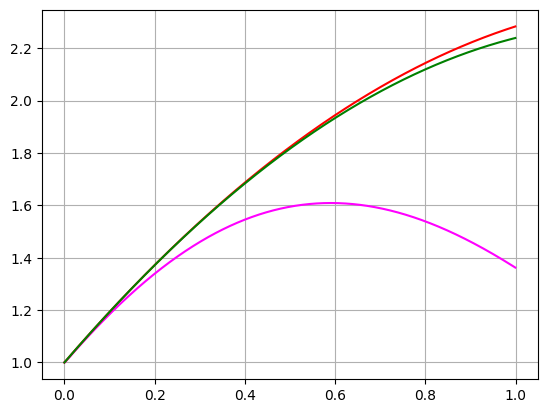

In [203]:
plt.grid(True)

plt.plot(x, y_eul(x, h), color = "magenta")

plt.plot(x, y_pic_1(x), color = "red")
plt.plot(x, y_pic_2(x), color = "green")

plt.show()

# Задача 2

In [196]:
# Приближения Пикара

def origin(y):
    return np.exp(y ** 2) - y ** 2 / 2 - 0.5

def x_1(y):
    return 0.5 + y ** 2 / 2 + y ** 4 / 4

def x_2(y):
    return 0.5 + y ** 2 / 2 + y ** 4 / 2 + y ** 6 / 12

def x_3(y):
    return 0.5 + y ** 2 / 2 + y ** 4 / 2 + y ** 6 / 6 + y ** 8 / 48

y_start, y_end = -0.5, 0.5
N = 100


h = (y_end - y_start) / N

y = np.arange(y_start, y_end, h)

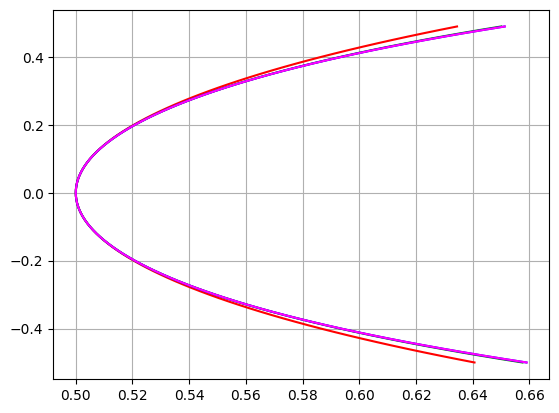

In [197]:
plt.grid(True)

plt.plot(x_1(y), y, color = "red")
plt.plot(x_2(y), y, color = "green")
plt.plot(x_3(y), y, color = "blue")

plt.plot(origin(y), y, color = "magenta")

plt.show()

# Задача 3